In [106]:
import matplotlib.pyplot as plt
from time import time
from random import randint

def run_and_plot(functions, names, generate_instance, start, end, step):
    for f in functions:
        timings = []
        for i in range(start, end, step):
            args = generate_instance(i)
            startt = time()
            f(*args)
            endt = time()
            timings.append(endt - startt)
        plt.plot(timings)
    plt.legend([n for n in names])

    


def generate_instance(max_len):
    max_int = max_len
    case = [sorted([randint(0,max_int) for _ in range(max_len)]), randint(0,max_int + max_int//2)]
    return case

In [87]:
generate_instance(20)

[[0, 0, 1, 1, 3, 3, 4, 4, 4, 5, 9, 10, 12, 13, 16, 17, 17, 17, 17, 19], 18]

### Implementation from lectures:

In [37]:
def bs(A, t, l=0, r=None):
    r = len(A) if r is None else r
    #print(l, r)
    if l >= r:
        return None
    mid = (l + r) // 2
    if A[mid] == t:
        return mid
    if A[mid] > t:
        return bs(A, t, l, mid)
    return bs(A, t, mid + 1, r)

### 3 realisations with bugs:

In [46]:
def bsearch1(arr, key):
    low, high = 0, len(arr)
    while high - low >= 1: #bug here: high - low > 1
        mid = (low + high) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            low = mid + 1 #bug here low = mid
        else:
            high = mid
    return None

# test case: [[1], 1] should return 0. None istead.

In [39]:
def bsearch2(arr, key, left=0, right=None):
    if right is None:
        right = len(arr)
    if right <= left: #bug here: right < left
        return None
    middle = (left + right) >> 1
    #print(left,right,middle)
    if arr[middle] > key:
        return bsearch2(arr, key, left, middle)
    if arr[middle] < key:
        return bsearch2(arr, key, middle + 1, right)
    return middle

# test case: [[], 1] should return None. IndexError instead

In [4]:
def bsearch3(arr, key):
    n = len(arr)
    if n < 2:
        return (0 if (n == 1 and arr[0] == key) else None)
    m = int(0.5 * n)
    if arr[m] > key:
        return bsearch3(arr[:m], key)
    result = bsearch3(arr[m:], key)
    return (result + m if result != None else None)

#complexity is n*log n

### Testing:

In [67]:
def test_bs(test_case,correct_algorithm,alg_to_test):
    flag = True
    answer = correct_algorithm(*test_case)
    for alg in alg_to_test:
        if alg(*test_case) == answer:
            print(alg.__name__,":Ok", answer)
        else:
            print(test_case, alg.__name__,"Wrong:", alg(*test_case), "Expected:", answer)
            flag = False
    return flag

In [42]:
test_cases = [
    [[],1],
    [[1],1],
    [[1],2],
    [[1,2],3],
    [[1,2],1],
    [[1,2],2],
    [[1,2,3],1],
    [[1,2,3],2],
    [[1,2,3],3],
    [[1,2,3],4],
    [[1,2,3,4],1],
    [[1,2,3,4],4],
    [[1,2,3,4],2],
    [[1,2,3,4],5]
]

In [57]:
from random import randint

def generate_test(max_len, max_int):
    case_len = randint(0,max_len)
    case = [sorted([randint(0,max_int) for _ in range(case_len)]), randint(0,max_int + max_int//2)]
    return case

In [69]:
flag = True
while flag:
    case = generate_test(6,6)
    flag = test_bs(case,bs,[bsearch1,bsearch2,bsearch3])
    

bsearch1 :Ok 1
bsearch2 :Ok 1
bsearch3 :Ok 1
bsearch1 :Ok None
bsearch2 :Ok None
bsearch3 :Ok None
bsearch1 :Ok None
bsearch2 :Ok None
bsearch3 :Ok None
bsearch1 :Ok 1
bsearch2 :Ok 1
[[0, 1, 1, 3, 3, 6], 1] bsearch3 Wrong: 2 Expected: 1


In [47]:
for test_case in test_cases:
    print(test_case)
    test_bs(test_case,bs,[bsearch1,bsearch2,bsearch3])
    

[[], 1]
bsearch1 :Ok None
bsearch2 :Ok None
bsearch3 :Ok None
[[1], 1]
bsearch1 :Ok 0
bsearch2 :Ok 0
bsearch3 :Ok 0
[[1], 2]
bsearch1 :Ok None
bsearch2 :Ok None
bsearch3 :Ok None
[[1, 2], 3]
bsearch1 :Ok None
bsearch2 :Ok None
bsearch3 :Ok None
[[1, 2], 1]
bsearch1 :Ok 0
bsearch2 :Ok 0
bsearch3 :Ok 0
[[1, 2], 2]
bsearch1 :Ok 1
bsearch2 :Ok 1
bsearch3 :Ok 1
[[1, 2, 3], 1]
bsearch1 :Ok 0
bsearch2 :Ok 0
bsearch3 :Ok 0
[[1, 2, 3], 2]
bsearch1 :Ok 1
bsearch2 :Ok 1
bsearch3 :Ok 1
[[1, 2, 3], 3]
bsearch1 :Ok 2
bsearch2 :Ok 2
bsearch3 :Ok 2
[[1, 2, 3], 4]
bsearch1 :Ok None
bsearch2 :Ok None
bsearch3 :Ok None
[[1, 2, 3, 4], 1]
bsearch1 :Ok 0
bsearch2 :Ok 0
bsearch3 :Ok 0
[[1, 2, 3, 4], 4]
bsearch1 :Ok 3
bsearch2 :Ok 3
bsearch3 :Ok 3
[[1, 2, 3, 4], 2]
bsearch1 :Ok 1
bsearch2 :Ok 1
bsearch3 :Ok 1
[[1, 2, 3, 4], 5]
bsearch1 :Ok None
bsearch2 :Ok None
bsearch3 :Ok None


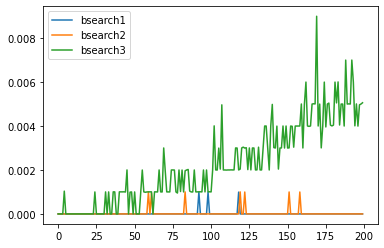

In [110]:
run_and_plot(
    [bsearch1,bsearch2,bsearch3],
    ["bsearch1","bsearch2","bsearch3"],
    generate_instance, 
    10, 200000, 1000
)

In [111]:
def bs(A, t, l=0, r=None):
    print(l,r)
    r = len(A) if r is None else r
    if l >= r:
        return -1
    mid = (l + 2 * r) // 3
    if A[mid] == t:
        return mid
    if A[mid] > t:
        return bs(A, t, l, mid)
    return bs(A, t, mid + 1, r)

In [114]:
bs([1,2,3,4,5,6,7,8,9,10,11,12,13],11)

0 None
9 13
9 11


10